In [1]:
import nltk
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
df = pd.read_csv(r'data\non-processed\dataset6\Twitter Sentiments.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#cleaning tweets
def cleanTweets(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' 
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

#clean the tweets
df['clean_tweets'] = df['tweet'].apply(cleanTweets)

df

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide: society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con..."


In [4]:
#get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)

df

,id,label,tweet,clean_tweets,Subjectivity,Polarity
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1.0,-0.500000
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...,0.2,0.200000
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,0.6,0.976562
4,5,0,factsguide: society now #motivation,factsguide: society now motivation,0.0,0.000000
...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...,0.0,0.000000
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,0.5,0.400000
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con...",0.0,0.000000


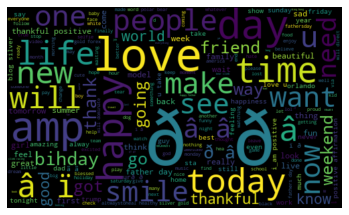

In [10]:
# word visualization
allWords = ' '.join([twts for twts in df['clean_tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
#function for analysing the data 
def getAnalysis(score):
    if score<0 :
        return 'Negative'
    elif score==0 :
        return 'Neutral'
    else:
        return 'Positive'

In [6]:
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,id,label,tweet,clean_tweets,Subjectivity,Polarity,Analysis
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
2,3,0,bihday your majesty,bihday your majesty,0.0,0.000000,Neutral
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,0.6,0.976562,Positive
4,5,0,factsguide: society now #motivation,factsguide: society now motivation,0.0,0.000000,Neutral
...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...,0.0,0.000000,Neutral
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,0.5,0.400000,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,1.0,-0.500000,Negative
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","sikh temple vandalised in in calgary, wso con...",0.0,0.000000,Neutral


In [7]:
# let's get negative tweets
print('Negative tweets:\n')
k=1
negativeTweets = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, negativeTweets.shape[0]):
  if(negativeTweets['Analysis'][i] == 'Negative'):
    print(str(k) + ') '+negativeTweets['clean_tweets'][i])
    print()
    k=k+1

Negative tweets:

1)   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   run

2) the next school year is the year for exams.ð¯ can't think about that ð­ school exams   hate imagine actorslife revolutionschool girl

3)  â ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   blog silver gold forex

4) we are so selfish. orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 

5) sad little dude..   badday coneofshame cats pissed funny laughs 

6) it was a hard monday due to cloudy weather. disabling oxygen production for today. goodnight badmonday  

7) it's unbelievable that in the 21st century we'd need something like this. again. neverump  xenophobia 

8) yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð 

9) whenever im   and something goes wrong  |  

10) you've really hu my feelings :(  

11) carrying a gun w


879)  not happy with y'all  still haven't linked my bvn to my account for over 3 months now 

880)   crazy how fast people come in and out of your life. ð¥  quote citation teenagers life reality  

881) your job today is to make yourself  ! not make someone else unhappy 

882) and by different, i mean life without a toxic ex. | goodriddance divorce divorced   freedom 

883) millions on $twtr &amp; all we come up with is brexit  - weak derivation of grexit &amp; bremain when remain would suffice -  

884) fridayfeeling   time for  rambo the squirrel to go. had to take down the bird feeder.  

885) got some friends coming round for coffee   days plumandashby cushions gardeninspoâ¦ 

886) i'm an ugly gay? newvideo truestory haters   

887)   french try to stone &amp; kill indians in quebec!  criminal      

888)  big blow to indians  . powerful man. rbi &amp; india will miss u badly. will miss his economics class too. tnks 4 d effo. salute

889)  went all around bangalore still dont h


1683)  someone should feed you grenades you stupid fuck   shit

1684) trying to compose myself after my eyes were assaulted watching  that tv chefs son was like a tramp on a chip! desperate cheap  

1685) jobs  chief angry over stolen lands:                nii adjetey obuor-buor ii, the gbee-owomli mantse... 

1686) today is a tragic,   day for the worldâs lgbt community  via 

1687) feeling overwhelmed by all the tragic events in the last week!    

1688)   inability to take responsibility for one's actions seems to be a common theme in russia -   

1689) are you black &amp; feel like the  are â¦on you? listen  retweet tampa miami newyorkâ¦ 

1690) such a   sad story this is- simply horrible that such sick twisted people live in our world. ripchristina 

1691) white  "social justice warriors" _ getting it wrong, again.  via  voterid maga p2 rnc dnc vote

1692) went you have an bad day of school you feel so sad and sad    but no one don't care about you

1693)  this white crowd tu

2309) teen girl killed, 3 others injured in downtown oakland shooting. guns mentalillness gangs ð¨ð¦ð¨ð¦ð¨ð¦ is   orlando 

2310) for all the times that you rained on my parade  ||  ms     grunge nature rad awsomeâ¦ 

2311) when you the only carry in your team :(  

2312) a white-skinned woman's unfair experience of  in india!  via 

2313) now is your time of grief, but i will see you again and you will rejoice, and no one will take away your joy.â    hope john 16:22

2314) sick of feeling down and stupid sorry to everyone i messed up with and sorry for being a weirdo and letting everyone down miss u all  

2315) whatever makes you feel bad, leave it. whatever makes you smile, keep it ð¸    life fitâ¦ 

2316) why  doesn't like mexico for come whit any show?:(  

2317) i despise hilary and sadly, hearing her speak now i'm telling myself "see trump, that's how a president is supposed to sound".  

2318) payintheusa   polar bear climb racing: angry polar bear climb racin

2888) another day, another mass shooting here in america. what happened to tolerance and respect for those with other opinions and values.  

2889)  another missed train thanks to your outrageous delays on the hamm&amp;city line to paddington. 14 minutes. useless fail  

2890)  people have forgotten the simplest commandment to love our neighbor. =(  

2891)  lanasprayberry should be fired if she thinks choking a child and the wrongful arrest of the parent is acceptable.â¦ 

2892) lil boys on that lil girl game,  

2893) haven't moved from this spot on couch in two days :( i feel everything falling apa. broken   upset misshim 

2894)   shame this cant be bought as an mp3 in blighty. usa, germany, france etc are possible but not here in the uk :-(  

2895)     to hear of wendyhuntbatch's passing and the sad news about the worldparrotrefuge. 

2896) being a woman, ex-stanford swimmer's ex-gf, testifies in his favor, despite knowing abt d horrific crime he committed on another woman.  

2

3781)  â gold locked in tight range above $ 1280, fed in spotlight   blog silver gold forex

3782)   sleepy tigh tight respect swag selfie   pixel pixela aseprite 

3783) in a feeble and desperate attempt to turn public mood against syria, in comes the next muslim falseflag op.   cnn bbc  

3784)  i find it sad and disgusting that a gorilla incident has way more outrage than the weak stanford rapist sentence.  

3785) rip to all innocent lives lost.   horrific  

3786) riparadise to the innocence that fell in orlando and who doe everyday from sick  â¦ 

3787) 80 thousand care  workers in the iuk are immigrants and most elderly people say they cant even understand them so bloody  

3788) . are very upset with   low-energy bad judgment very small hands!  r u angry?   

3789) /co/-   guitar i'm sorry guys, it's all my fault - comics i'm sorry, it's all my fault -/co/- comics and ca 

3790)   what if obama showed the same anger and disgust towards islamic terrorist as he does trump... 



4378) i be making people so angry wit me &amp; ion even bee doing none mane ð theyy be so mad fa no reason.   ð­

4379) funny...i'm not the least bit  ! about it. 

4380)     so disappointed to hear you r not helping    

4381) had a lazy morning with djangountamed_ cats kitten cat emo   metal vocalist selfieâ¦ 

4382) liberation is finding out days after the breakup that i had every right to be angry. the justification of these feelings makes me  .

4383) hello long weekend!!ðððððð   longweekend junelongweekendâ¦ 

4384)  chicken clearly within date, yet can smell it's gone off through the packaging! rotten nodinner   

4385) my baby terrorizing the community and the neighborhood. ð¶ð¤â¤ï¸ dogs cold   valentinedayâ¦ 

4386)   motorcycle club event moment motorcycle event club casual fashion style   timeâ¦ 

4387) so  might not be the worst person in the world, but his followers prob are. gooutside    

4388) unbelievable that akrotiri and knossos argu

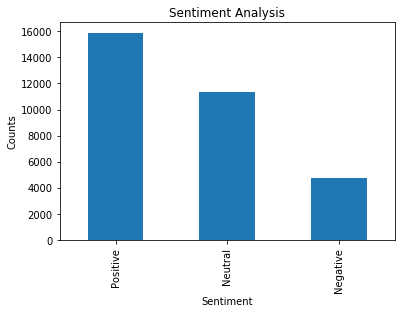

In [8]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [20]:
#Let's check statistics
df['Analysis'].value_counts()

Positive    15881
Neutral     11358
Negative     4723
Name: Analysis, dtype: int64

In [21]:
negTweets = df[df.Analysis == 'Negative']
negTweets = negTweets['clean_tweets']
negTweets

negTweets.shape[0] / df.shape[0] * 31962

4723.0